## Down Sampling the 3D image
## Import necessary libraries

In [1]:
!pip install qiskit==0.43.0 qiskit-aer==0.12.0 qiskit-machine-learning==0.5.0 qiskit-algorithms
!pip install pylatexenc numpy scipy psutil matplotlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-algorithms to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=513347cc27ee09ec16a5b8b4287e3da127c54ffcc1083e0eaecfc0db8befb29f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive
import time

# Mount Google Drive to access image or dataset
drive.mount('/content/drive')
%matplotlib inline

# Define the path to the sample image
image_path= '/content/drive/My Drive/Colab Notebooks/Image/sample.JPEG'
#image_path = '/content/drive/My Drive/Colab Notebooks/Image/sample1.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import keras
from keras.preprocessing.image import load_img


# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size) # Load the image and resize it to the target size
    img_array = img_to_array(img) / 255.0  # Convert the image to an array and normalize pixel values (0-1 range)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension to the image array
    return img_array

In [68]:
start_time = time.time()  # Start time tracking

# Load the image for testing (replace this with your actual image)
sample_image = load_and_preprocess_image(image_path, target_size=(64, 64))

In [69]:
#from google.colab import drive
#drive.mount('/content/drive/My Drive/Quantum POC')

Text(0.5, 1.0, 'Original Image')

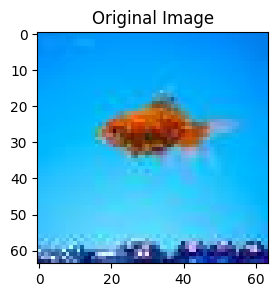

In [70]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title("Original Image")

In [71]:
# Import necessary Keras modules for building the encoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Lambda, MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, KLDivergence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [72]:
# Define the encoder network
encoder_deep_construct = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    #Conv2D(2048, (3, 3), padding='same', activation='relu'),
    Conv2D(1, (3, 3), padding='same', activation='relu'),
    #MaxPooling2D((2, 2)),
    #Conv2D(4096, (3, 3), padding='same', activation='relu'),
    #MaxPooling2D((2, 2)),
    #Conv2D(1, (3, 3), padding='same', activation='relu'),
])
# Display the encoder architecture
encoder_deep_construct.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 1)             │           9,217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,916,161 (22.57 MB)

 Trainable params: 5,916,161 (22.57 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Set the path to your image dataset folder

#data_dir = '/content/drive/My Drive/Quantum POC'
data_dir = './'
batch_size = 1
image_size = (64, 64)
latent_dim = 256
epochs = 50

# Data preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # You can adjust the validation split ratio
)

In [74]:
train_data = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='input',
    subset='training'
)

Found 4303 images belonging to 3 classes.


In [75]:
# Fit the mode ?

In [76]:
# Generate a downsampled representation of the image
downsampled_image = encoder_deep_construct.predict(sample_image)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [77]:
# Convert the downsampled image back to pixel values for visualization
new_image = (downsampled_image * 255).astype(np.float16)

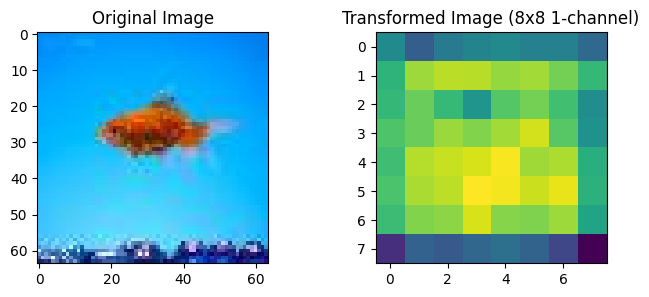

In [78]:
# Display the original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Transformed Image (8x8 1-channel)")
plt.show()

<hr>

# VAE for 3D Images

In [79]:
# Import additional libraries for data preprocessing and training
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Lambda, MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, KLDivergence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [80]:
# Set the path to your image dataset folder - Set up the data directory and parameters
data_dir = './'
batch_size = 1
image_size = (64, 64)
latent_dim = 256  # Dimension of the latent space
epochs = 50

# Data augmentation and preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    validation_split=0.2  # Split data into training and validation sets
)

In [81]:
# Load training data
train_data = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='input',     # Input matches the output for reconstruction
    subset='training'
)

Found 4303 images belonging to 3 classes.


In [82]:
# Define the encoder with a latent space of 256 dimensions
encoder_deep = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(2048, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(4096, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(1, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(latent_dim)  # Dense layer for the latent representation
])
# Display the encoder architecture
encoder_deep.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 2048)          │      18,876,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 4096)          │      75,501,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 4096)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 2, 2, 1)             │          36,865 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │           1,280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,323,073 (382.70 MB)

 Trainable params: 100,323,073 (382.70 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Define the decoder (inverse of encoder)
decoder_deep = Sequential([
    Input(shape=(latent_dim,)),
    Dense(4096),  # Reverse of the Flatten layer in the encoder
    Reshape((2, 2, 1024)),
    Conv2DTranspose(4096, (3, 3), padding='same', activation='relu'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(2048, (3, 3), padding='same', activation='relu'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(1024, (3, 3), padding='same', activation='relu'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(256, (3, 3), padding='same', activation='relu'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(128, (3, 3), padding='same', activation='relu'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(3, (3, 3), padding='same', activation='sigmoid'),  # Reverse of Conv2D with 3 channels (RGB) (Final layer with RGB output)
])
# Display the decoder architecture
decoder_deep.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 2, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 2, 2, 4096)          │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 4, 4, 4096)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 4, 4, 2048)          │      75,499,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 8, 8, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 8, 8, 1024)          │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 16, 16, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 16, 16, 256)         │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_10                  │ (None, 32, 32, 128)         │         295,040 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_11                  │ (None, 64, 64, 3)           │           3,459 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,838,467 (518.18 MB)

 Trainable params: 135,838,467 (518.18 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Define the Variational Autoencoder (VAE)
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Model

In [85]:
# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [86]:
# VAE model - Input to the VAE
vae_input = Input(shape=(64, 64, 3))
z_mean = encoder_deep(vae_input)
z_log_var = encoder_deep(vae_input)

z = Lambda(sampling)([z_mean, z_log_var])
vae_output = decoder_deep(z)

# Compile the VAE
vae = Model(vae_input, vae_output)

In [87]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Custom loss layer to compute VAE loss
class VAELossLayer(Layer):
    def call(self, inputs):
        vae_input, vae_output, z_mean, z_log_var = inputs

        # Compute reconstruction loss (MSE)
        reconstruction_loss = tf.reduce_mean(tf.square(vae_input - vae_output))

        # Compute KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))

        # Total loss
        total_loss = reconstruction_loss + kl_loss

        # Add the loss to the model
        self.add_loss(total_loss)

        return vae_output  # Pass the output forward

# Apply the custom loss layer
vae_output = VAELossLayer()([vae_input, vae_output, z_mean, z_log_var])

# Compile the model
vae = Model(vae_input, vae_output)
vae.compile(optimizer=Adam(learning_rate=1e-5))

In [88]:
# Train the VAE
history = vae.fit(
    train_data,
    epochs = 50,
    validation_data=train_data
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4303/4303 ━━━━━━━━━━━━━━━━━━━━ 223s 50ms/step - loss: 0.0769 - val_loss: 0.0769
Epoch 2/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0770 - val_loss: 0.0768
Epoch 3/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0771 - val_loss: 0.0769
Epoch 4/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0768 - val_loss: 0.0772
Epoch 5/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0768 - val_loss: 0.0769
Epoch 6/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0770 - val_loss: 0.0768
Epoch 7/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0764 - val_loss: 0.0770
Epoch 8/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0772 - val_loss: 0.0768
Epoch 9/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0771 - val_loss: 0.0767
Epoch 10/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0764 - val_loss: 0.0767
Epoch 11/50
4303/4303 ━━━━━━━━━━━━━━━━━━━━ 172s 40ms/step - loss: 0.0764 - val_loss: 0.0769
Epoch 12

In [89]:
# Use the VAE model to Predict and reconstruct the image
reconstructed_image = vae.predict(sample_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [90]:
reconstructed_image.shape

(1, 64, 64, 3)

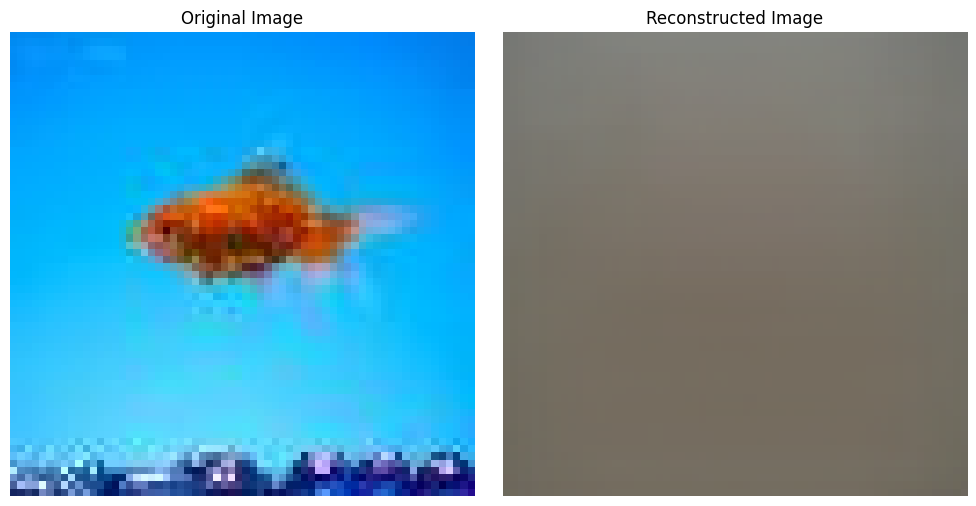

In [91]:
# Display the original and reconstructed images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image[0])
plt.axis('off')

plt.tight_layout()
plt.show()

In [92]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [93]:
# After the model is trained and the reconstructed_image is obtained

# Calculate Compression Ratio
#original_size = sample_image[0].size
#compressed_size = latent_dim  # Size of the latent space representation
#compression_ratio = original_size / compressed_size

# Calculate PSNR
#psnr_value = psnr(sample_image[0], reconstructed_image[0])

# Calculate SSIM
#ssim_value = ssim(sample_image[0], reconstructed_image[0], multichannel=True)

# Print the metrics in table format
#print(f"{'Metric':<20}{'Value':<10}")
#print(f"{'-'*30}")
#print(f"{'Compression Ratio':<20}{compression_ratio:<10.2f}")
#print(f"{'PSNR':<20}{psnr_value:<10.2f}")
#print(f"{'SSIM':<20}{ssim_value:<10.2f}")

In [94]:
# Calculate performance metrics (Compression Ratio, PSNR, SSIM)
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Calculate Compression Ratio
original_size = sample_image[0].size
compressed_size = latent_dim  # Size of the latent space representation
compression_ratio = original_size / compressed_size

# Calculate PSNR
psnr_value = psnr(sample_image[0], reconstructed_image[0], data_range=1.0)

# Calculate SSIM
# Explicitly set win_size, channel_axis, and data_range
ssim_value = ssim(
    sample_image[0],
    reconstructed_image[0],
    win_size=3,  # Set a smaller window size that fits
    channel_axis=-1,  # Specify the channel axis for color images
    data_range=1.0  # Specify the range of pixel values
)

# Print the metrics in table format
print(f"{'Metric':<20}{'Value':<10}")
print(f"{'-'*30}")
print(f"{'Compression Ratio':<20}{compression_ratio:<10.2f}")
print(f"{'PSNR':<20}{psnr_value:<10.2f}")
print(f"{'SSIM':<20}{ssim_value:<10.2f}")

Metric              Value     
------------------------------
Compression Ratio   48.00     
PSNR                7.83      
SSIM                0.45      


<hr>

# Quantum AutoEncoder

In [128]:
# Importing required libraries for quantum computation and visualization
import json
import time
import warnings
import qiskit
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
#from qiskit import QuantumCircuit,transpile, execute, Aer
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.execute_function import execute
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit import Parameter, QuantumCircuit
#from qiskit.circuit.library.data_preparation.initializer import Initialize
from qiskit.extensions import Initialize
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
#from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
algorithm_globals.random_seed = 42 ## Set a random seed for reproducibility in quantum operations

In [129]:
# Check available quantum backends
from qiskit import Aer
print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


In [97]:
#import os
#os._exit(00)


In [98]:
#Completely Uninstall Qiskit and Dependencies:
#!pip uninstall -y qiskit qiskit-aer qiskit-terra qiskit-ibmq-provider qiskit-machine-learning qiskit-algorithms


In [99]:
#Reinstall Qiskit and Required Packages:
#!pip install qiskit==0.43.0 qiskit-aer==0.12.0 qiskit-machine-learning==0.5.0 qiskit-algorithms
#!pip install pylatexenc numpy scipy psutil matplotlib


In [130]:
#!pip install pylatexenc
import pylatexenc
print("pylatexenc installed successfully!")


pylatexenc installed successfully!


In [131]:
import qiskit
print(qiskit.__version__)  # Should print 0.43.0
from qiskit import QuantumCircuit, Aer
print("Qiskit is installed correctly!")


0.24.0
Qiskit is installed correctly!


In [132]:
# Define an ansatz circuit (variational form) for the quantum encoder
# This will represent the parameterized quantum gates
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)  # 5 layers of parameterized gates

In [133]:
RawFeatureVector(64).qubits

[Qubit(QuantumRegister(6, 'q'), 0),
 Qubit(QuantumRegister(6, 'q'), 1),
 Qubit(QuantumRegister(6, 'q'), 2),
 Qubit(QuantumRegister(6, 'q'), 3),
 Qubit(QuantumRegister(6, 'q'), 4),
 Qubit(QuantumRegister(6, 'q'), 5)]

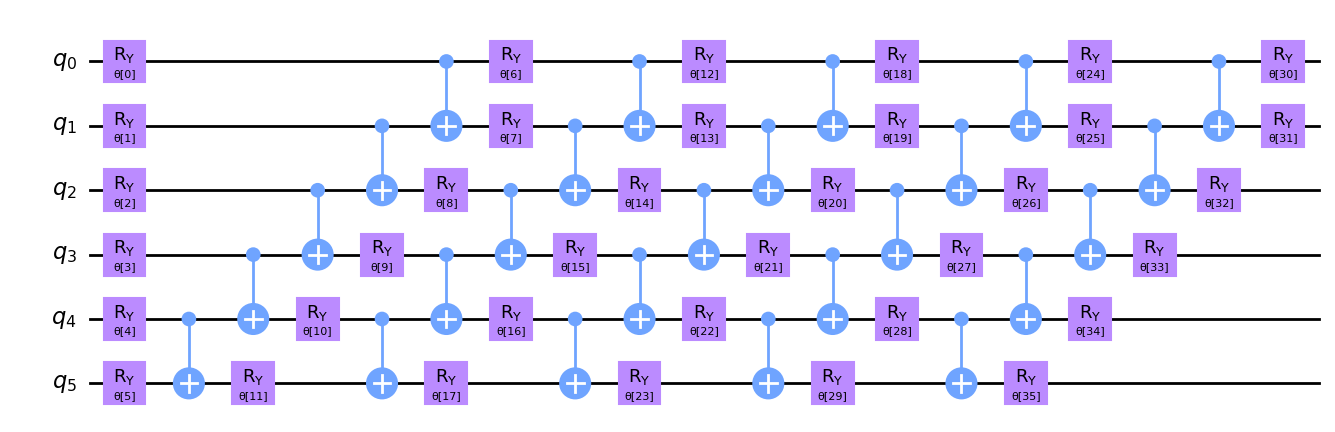

In [134]:
# Example usage: Visualize the ansatz with 6 qubits
num_qubits = 6
circ = ansatz(num_qubits)
circ.decompose().draw("mpl") # Decomposes the ansatz into individual quantum gates

In [135]:
# Function to create a quantum autoencoder circuit
def auto_encoder_circuit(num_latent, num_trash):
    """
    Constructs a quantum circuit for the autoencoder.

    Args:
    - num_latent: Number of latent qubits (compressed representation).
    - num_trash: Number of trash qubits (discarded during encoding).

    Returns:
    - QuantumCircuit: The full quantum autoencoder circuit.
    """
    # Create quantum and classical registers
    qr = QuantumRegister(num_latent + 2 * num_trash + 1, "q") # Latent, trash, auxiliary qubits
    cr = ClassicalRegister(1, "c") # Classical register to store measurement results

    circuit = QuantumCircuit(qr, cr)

    # Apply the ansatz to latent and trash qubits
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)
    circuit.barrier() # Add a barrier for visualization clarity

    # Define the auxiliary qubit for the SWAP test
    auxiliary_qubit = num_latent + 2 * num_trash

    # swap test - Perform the SWAP test to measure similarity between trash and latent spaces
    circuit.h(auxiliary_qubit) # Apply Hadamard to auxiliary qubit

    for i in range(num_trash):
        circuit.cswap(auxiliary_qubit, num_latent + i, num_latent + num_trash + i) # Controlled SWAP

    circuit.h(auxiliary_qubit) # Apply Hadamard again

    # Measure the auxiliary qubit
    circuit.measure(auxiliary_qubit, cr[0])

    return circuit

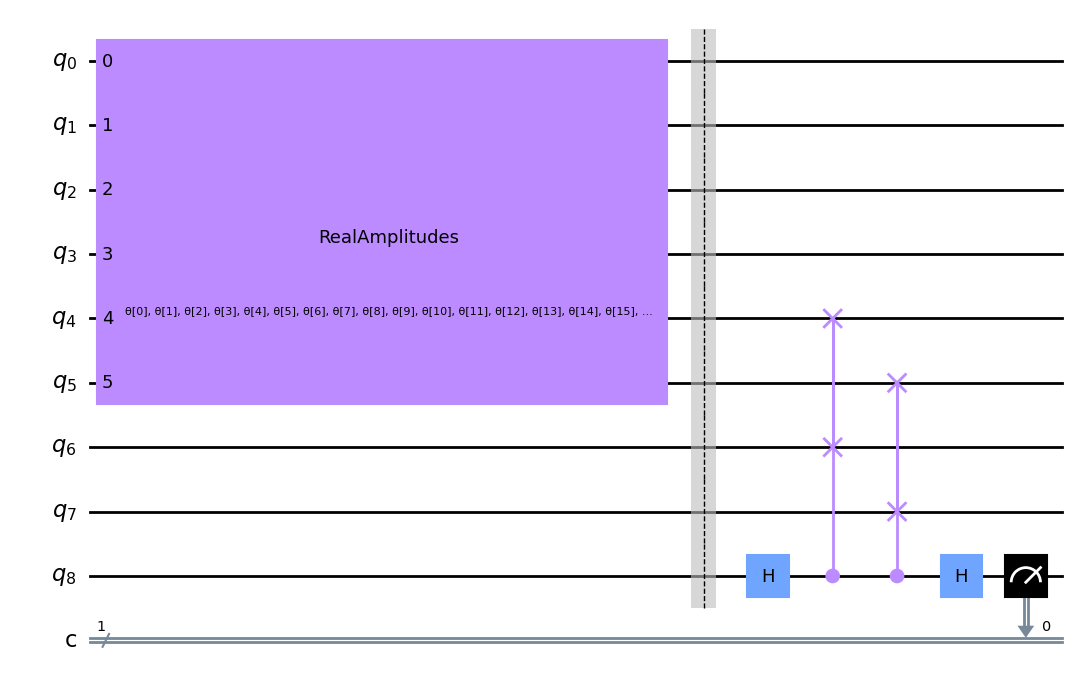

In [136]:
# Define the latent and trash qubit count
num_latent = 4
num_trash = 2
# Build and visualize the quantum autoencoder circuit
circuit = auto_encoder_circuit(num_latent, num_trash)
circuit.draw("mpl")

### Domain Wall State

In [137]:
# Define a domain wall state for initialization
def domain_wall(circuit, a, b):
    # Here we place the Domain Wall to qubits a to b in our circuit
    for i in np.arange(int(b / 2), int(b)):
        circuit.x(i) # Apply X gate to the second half of the qubits
    return circuit

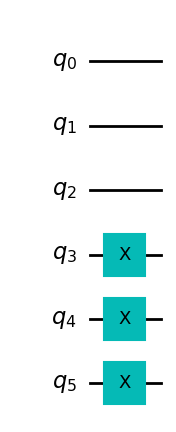

In [138]:
# Create and visualize a domain wall circuit
domain_wall_circuit = domain_wall(QuantumCircuit(6), 0, 6)
domain_wall_circuit.draw("mpl")

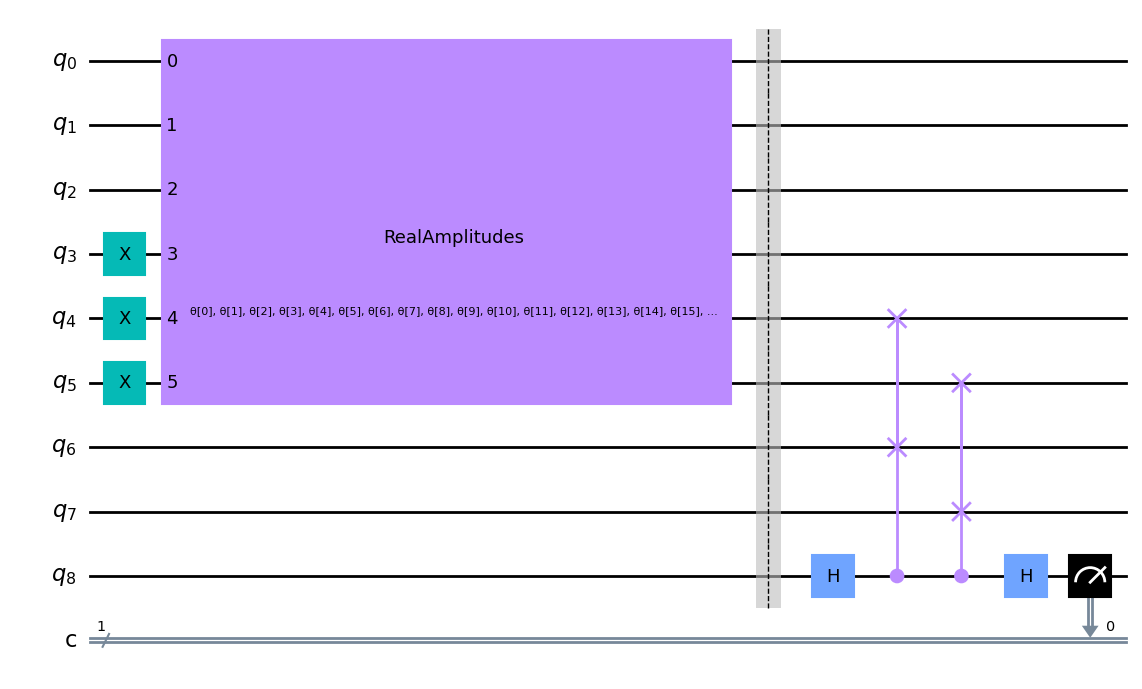

In [139]:
# Integrate the domain wall and autoencoder circuits
ae = auto_encoder_circuit(num_latent, num_trash)
qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)
qc = qc.compose(domain_wall_circuit, range(num_latent + num_trash)) # Apply domain wall
qc = qc.compose(ae) # Add autoencoder circuit
qc.draw("mpl")

In [140]:
# Define an identity interpret function for the quantum neural network
def identity_interpret(x):
    return x # Return the input without modification

In [141]:
# Define a quantum neural network (QNN) using the autoencoder circuit
qnn = SamplerQNN(
    circuit=qc, # Quantum circuit
    input_params=[], # Input parameters
    weight_params=ae.parameters, # Trainable parameters
    interpret=identity_interpret, # Interpretation function
    output_shape=2, # Output shape
)

In [142]:
# Define a cost function for optimization
def cost_func_domain(params_values):
    """
    Cost function for the quantum autoencoder.

    Args:
    - params_values: Trainable parameters for the circuit.

    Returns:
    - cost: Objective function value based on QNN output.

    """
    probabilities = qnn.forward([], params_values) # Forward pass through the QNN
    # we pick a probability of getting 1 as the output of the network
    cost = np.sum(probabilities[:, 1]) # Sum of probabilities for state '1'

    # Plot the objective function value
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    return cost

In [143]:
ae.num_parameters

36

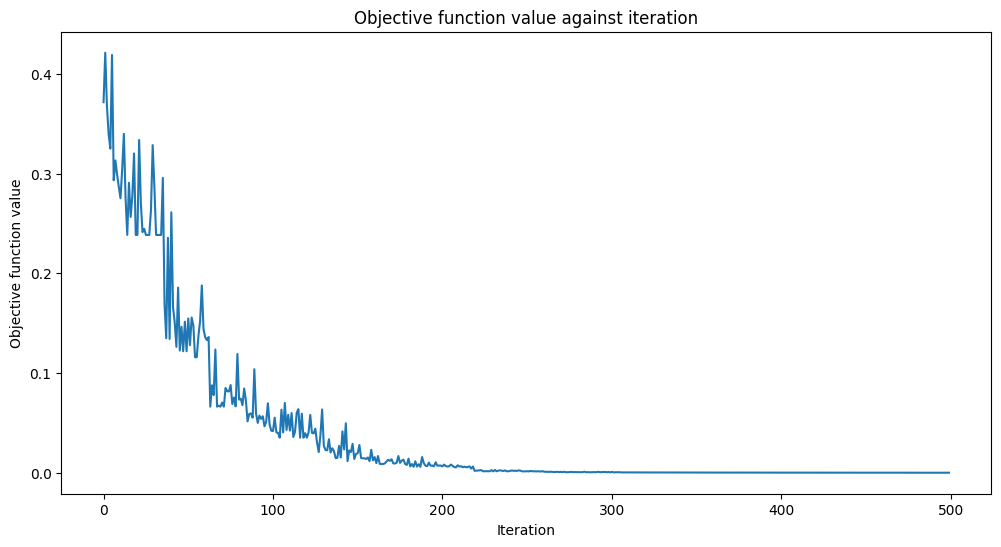

Fit in 76.76 seconds


In [144]:
# Optimization setup
opt = COBYLA(maxiter=500) # COBYLA optimizer with 500 iterations
initial_point = algorithm_globals.random.random(ae.num_parameters)

# Optimize the autoencoder
objective_func_vals = []  # Store cost values for each iteration
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
opt_result = opt.minimize(cost_func_domain, initial_point) # Minimize the cost function
elapsed = time.time() - start

print(f"Fit in {elapsed:0.2f} seconds") #print(f"Optimization completed in {elapsed:0.2f} seconds")

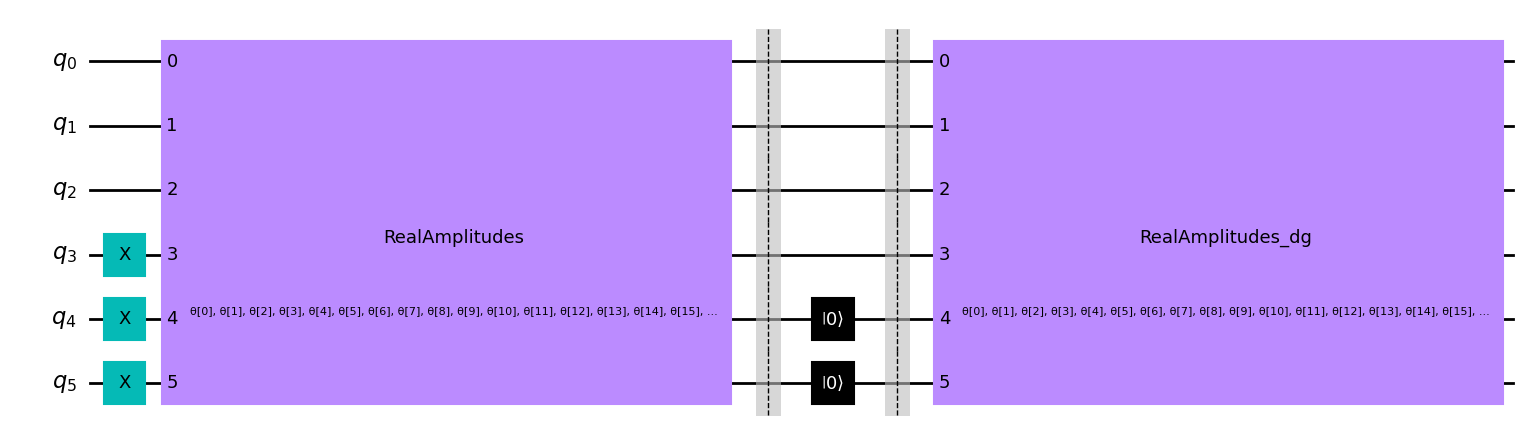

In [145]:
# Testing the autoencoder circuit
test_qc = QuantumCircuit(num_latent + num_trash)
test_qc = test_qc.compose(domain_wall_circuit) # Apply domain wall state
ansatz_qc = ansatz(num_latent + num_trash)  # Ansatz for encoding
test_qc = test_qc.compose(ansatz_qc) # Apply ansatz
test_qc.barrier()
test_qc.reset(5) # Reset unused qubits
test_qc.reset(4)
test_qc.barrier()
test_qc = test_qc.compose(ansatz_qc.inverse()) # Decode the compressed representation

test_qc.draw("mpl")

In [146]:
test_qc = test_qc.assign_parameters(opt_result.x)

In [147]:
# Compute fidelity between input and output states
domain_wall_state = Statevector(domain_wall_circuit).data # Input state
output_state = Statevector(test_qc).data # Output state after decoding

fidelity = np.sqrt(np.dot(domain_wall_state.conj(), output_state) ** 2)
print("Fidelity of our Output State with our Input State: ", fidelity.real)

Fidelity of our Output State with our Input State:  0.9998478523307347


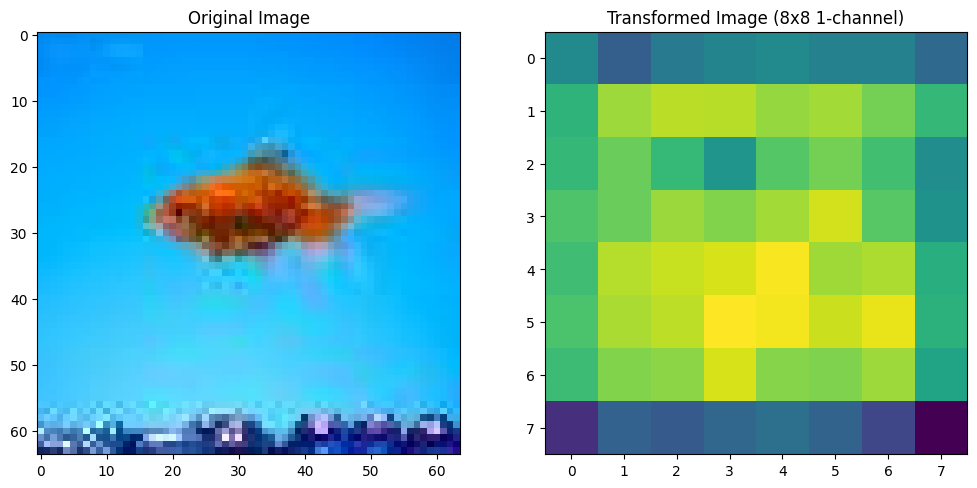

In [148]:
# Display the original image and the new image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Transformed Image (8x8 1-channel)")
plt.show()

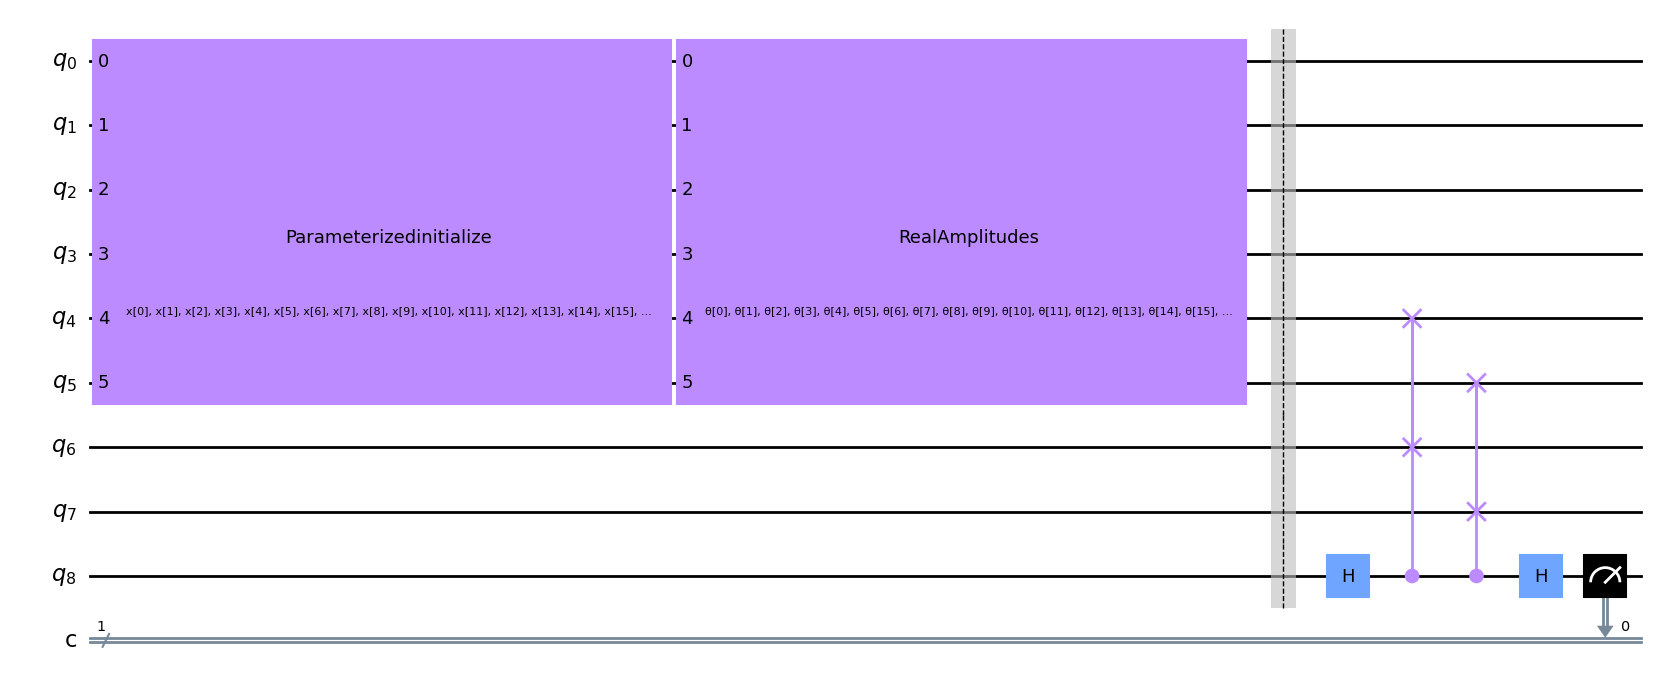

In [149]:
num_latent = 4
num_trash = 2

fm = RawFeatureVector(2 ** (num_latent + num_trash))

ae = auto_encoder_circuit(num_latent, num_trash)

qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)
qc = qc.compose(fm, range(num_latent + num_trash))
qc = qc.compose(ae)

qc.draw("mpl")

In [150]:
def identity_interpret(x):
    return x

In [151]:
qnn = SamplerQNN(
    circuit=qc,
    input_params=fm.parameters,
    weight_params=ae.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

In [152]:
def cost_func_digits(params_values):
    probabilities = qnn.forward(new_image.flatten(), params_values)
    cost = np.sum(probabilities[:, 1]) #/ train_images.shape[0]

    # plotting part
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

    return cost

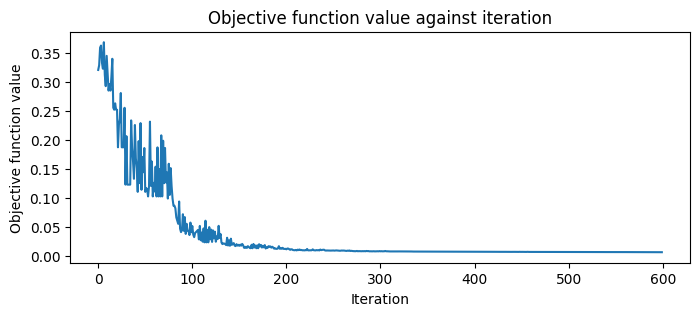

Fit in 109.02 seconds


In [153]:
from qiskit_machine_learning.neural_networks import SamplerQNN

opt = COBYLA(maxiter=600)

objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (8, 3)

start = time.time()
opt_result = opt.minimize(fun=cost_func_digits, x0=initial_point)
#opt_result = opt.minimize(fun=cost_func_digits)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

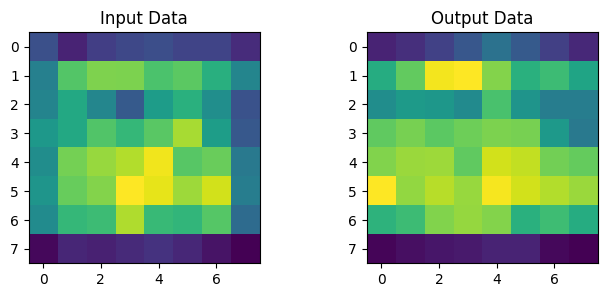

In [154]:
# Test
test_qc = QuantumCircuit(num_latent + num_trash)
test_qc = test_qc.compose(fm)
ansatz_qc = ansatz(num_latent + num_trash)
test_qc = test_qc.compose(ansatz_qc)
test_qc.barrier()
test_qc.reset(5)
test_qc.reset(4)
test_qc.barrier()
test_qc = test_qc.compose(ansatz_qc.inverse())

original_qc = fm.assign_parameters(new_image.flatten())
original_sv = Statevector(original_qc).data
original_sv = np.reshape(np.abs(original_sv) ** 2, (8, 8))

param_values = np.concatenate((new_image.flatten(), opt_result.x))
output_qc = test_qc.assign_parameters(param_values)
output_sv = Statevector(output_qc).data
output_sv = np.reshape(np.abs(output_sv) ** 2, (8, 8))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(original_sv)
ax1.set_title("Input Data")
ax2.imshow(output_sv)
ax2.set_title("Output Data")
plt.show()

## Basic Completed

In [155]:
# Performance Metrics
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Calculate Compression Ratio for Quantum Autoencoder
# Assuming the quantum state is a compressed representation
compression_ratio_quantum = original_size / num_qubits

# Calculate PSNR
psnr_value_quantum = psnr(original_sv, output_sv, data_range=1.0)

# Calculate SSIM
# Explicitly set the `data_range` parameter
ssim_value_quantum = ssim(original_sv, output_sv, data_range=1.0)

# Print the metrics in table format for Quantum Autoencoder
print(f"{'Metric':<20}{'Value':<10}")
print(f"{'-'*30}")
print(f"{'Compression Ratio':<20}{compression_ratio_quantum:<10.2f}")
print(f"{'PSNR':<20}{psnr_value_quantum:<10.2f}")
print(f"{'SSIM':<20}{ssim_value_quantum:<10.2f}")


Metric              Value     
------------------------------
Compression Ratio   2048.00   
PSNR                48.90     
SSIM                0.99      


In [156]:
end_time = time.time() # End time tracking
elapsed_time = end_time - start_time  # Compute total time in seconds

# Convert to minutes
elapsed_minutes = elapsed_time / 60
print(f"Overall Time: {elapsed_time:.2f} seconds ({elapsed_minutes:.2f} minutes)")


Overall Time: 9517.89 seconds (158.63 minutes)
